In [22]:
import pandas as pd
import numpy as np
from counlist import countrylist

In [23]:
unemployment = pd.read_csv("..\\documentation\\unemployment_all_ratio.csv")
print(unemployment.dtypes, "\n\n", "Rows, Columns: ", unemployment.shape,"\n\n", unemployment.columns, "\n\n", unemployment.head())

COUNTRY                   object
Country                   object
SEX                       object
Sex                       object
AGE                        int64
Age                       object
SERIES                    object
Series                    object
FREQ                      object
Frequency                 object
TIME                       int64
Time                       int64
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes               float64
Flags                    float64
dtype: object 

 Rows, Columns:  (199887, 21) 

 Index(['COUNTRY', 'Country', 'SEX', 'Sex', 'AGE', 'Age', 'SERIES', 'Series',
       'FREQ', 'Frequency', 'TIME', 'Time', 'Unit Code', 'Unit',
       'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Fl

In [24]:
unemployment = unemployment.loc[unemployment['Series'] == "Unemployment rate"]  #selecting only values of interest

In [25]:
unemployment.head()

,COUNTRY,Country,SEX,Sex,AGE,Age,SERIES,Series,FREQ,Frequency,...,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
120,AUS,Australia,MW,All persons,1519,15 to 19,UR,Unemployment rate,A,Annual,...,2000,PC,Percentage,0,Units,NaN,NaN,16.210327,NaN,NaN
121,AUS,Australia,MW,All persons,1519,15 to 19,UR,Unemployment rate,A,Annual,...,2001,PC,Percentage,0,Units,NaN,NaN,17.677139,NaN,NaN
122,AUS,Australia,MW,All persons,1519,15 to 19,UR,Unemployment rate,A,Annual,...,2002,PC,Percentage,0,Units,NaN,NaN,16.854612,NaN,NaN
123,AUS,Australia,MW,All persons,1519,15 to 19,UR,Unemployment rate,A,Annual,...,2003,PC,Percentage,0,Units,NaN,NaN,15.695871,NaN,NaN
124,AUS,Australia,MW,All persons,1519,15 to 19,UR,Unemployment rate,A,Annual,...,2004,PC,Percentage,0,Units,NaN,NaN,15.622854,NaN,NaN


In [26]:
unemp = unemployment.loc[unemployment["Country"].isin(countrylist)]      #selecting values only for countries in both dataframes

In [27]:
unemp = unemp[~unemp.Country.str.contains("Euro")]                #discarding groups of countries(no info in the other dataframe)
unemp = unemp[~unemp.Country.str.contains("OECD")]

In [28]:
unemp.shape

(58402, 21)

In [29]:
unemp = unemployment.rename(columns={'SEX': 'Gender', 'Value':'Unemploy_Rate', "Time": "Year"})   #renaming columns for better understanding and according to the other dataframe

In [30]:
unemp = unemp[['Country', 'Gender', 'Age', 'Year', 'Unemploy_Rate']]     #selecting only needed columns

In [31]:
unemp.year.unique() #check years range

AttributeError: 'DataFrame' object has no attribute 'year'

In [11]:
unemp = unemp[unemp['year'] <= 2016]            #setting years range according to suicide dataframe

In [14]:
unemp.describe()

,AGE,TIME,Time,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,58402.000000,58402.000000,58402.000000,58402.0,0.0,0.0,58402.000000,0.0,0.0
mean,43329.422999,2009.592565,2009.592565,0.0,NaN,NaN,7.724790,NaN,NaN
std,183396.168967,5.739089,5.739089,0.0,NaN,NaN,8.002514,NaN,NaN
min,1519.000000,2000.000000,2000.000000,0.0,NaN,NaN,0.000000,NaN,NaN
25%,2534.000000,2005.000000,2005.000000,0.0,NaN,NaN,3.249072,NaN,NaN
50%,4044.000000,2010.000000,2010.000000,0.0,NaN,NaN,5.529585,NaN,NaN
75%,6064.000000,2015.000000,2015.000000,0.0,NaN,NaN,9.305861,NaN,NaN
max,900000.000000,2019.000000,2019.000000,0.0,NaN,NaN,80.754960,NaN,NaN


In [12]:
unemp.gender.unique()          #check how genders are described

array(['MW', 'MEN', 'WOMEN'], dtype=object)

In [13]:
unemp.drop(unemp[unemp.gender == 'MW'].index, inplace=True)       #adapt gender descriptions to the dataframe to be contrasted with
unemp.loc[unemp['gender'] == "MEN", 'gender'] = "male"
unemp.loc[unemp['gender'] == "WOMEN", 'gender'] = "female"

In [14]:
unemp.age.unique() #check how ages are grouped

array(['15 to 19', '15 to 24', '15 to 64', '20 to 24', '25 to 29',
       '25 to 34', '25 to 39', '25 to 54', '25 to 64', '30 to 34',
       '35 to 39', '35 to 44', '40 to 44', '40 to 49', '45 to 49',
       '45 to 54', '50 to 54', '55 to 59', '55 to 64', '60 to 64',
       '65 to 69', '65+', '70 to 74', '70+', '75+', 'Total', '75 to 79+',
       '80+'], dtype=object)

In [15]:
unemp = unemp[(unemp['age'] == '15 to 24') | (unemp['age'] == '25 to 34') |(unemp['age'] == '35 to 44') |(unemp['age'] == '45 to 54') | (unemp['age'] == '55 to 64') |(unemp['age'] == '65 to 69') | (unemp['age'] == '70 to 74')]      #reducing age ranges to common with the dataframe

In [16]:
unemp['age'] = unemp['age'].str.replace(' to ', '-')  #normalising age format

In [17]:
#unemp.set_index('country', inplace=True)

In [18]:
import matplotlib as plt
import seaborn as sns
import plotly as po

In [19]:
unemp.dtypes

country           object
gender            object
age               object
year               int64
unemploy_rate    float64
dtype: object

<AxesSubplot:xlabel='unemploy_rate', ylabel='Density'>

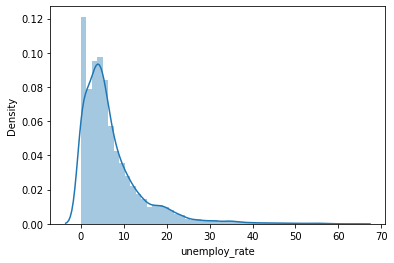

In [20]:
sns.distplot(unemp.unemploy_rate, bins=50)

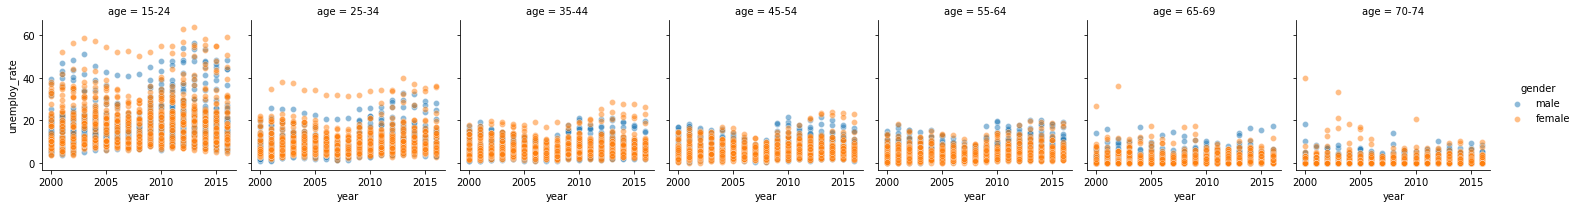

In [21]:
q = sns.FacetGrid(unemp, col="age", hue="gender")
q.map(sns.scatterplot, "year", "unemploy_rate", alpha=.5)
q.add_legend()

In [22]:
multi_index = pd.pivot_table(unemp, index = ['country', 'age'], values = 'unemploy_rate', aggfunc = 'mean')
